In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
x_data = np.linspace(0.0,10.0,1000000)

In [24]:
noise = np.random.randn(len(x_data))

In [25]:
print(noise)

[-0.171963   -1.27416628  0.20070202 ..., -0.22358279  0.87760537
  0.70646804]


```y = mx+b
b=5
```

In [26]:
y_true = (0.5* x_data) + 5 + noise

In [27]:
x_df = pd.DataFrame(data=x_data, columns=['X'])

In [28]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [29]:
print(y_df.head())

          Y
0  4.828037
1  3.725839
2  5.200712
3  5.920115
4  6.725910


In [30]:
print(x_df.head())

         X
0  0.00000
1  0.00001
2  0.00002
3  0.00003
4  0.00004


In [31]:
import pandas as pd
my_data = pd.concat([x_df,y_df], axis=1)

In [32]:
print(my_data.head())

         X         Y
0  0.00000  4.828037
1  0.00001  3.725839
2  0.00002  5.200712
3  0.00003  5.920115
4  0.00004  6.725910


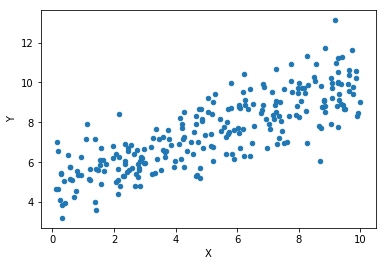

In [34]:
#lets plot only few samples
my_data.sample(n=250).plot(kind='scatter', x='X', y= 'Y')

In [35]:
#Feed the data for training batch by batch

In [36]:
batch_size = 8 #8 points at a time 

In [37]:
np.random.randn(2)

array([-0.48986369,  0.29998581])

In [38]:
m = tf.Variable(0.48)
b = tf.Variable(0.29)

In [39]:
# Placeholder

In [40]:
xph = tf.placeholder(tf.float32, [batch_size])

In [41]:
yph = tf.placeholder(tf.float32, [batch_size])

In [42]:
y_model = m*xph + b

In [43]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [45]:
train = optimizer.minimize(error)

In [46]:
init = tf.global_variables_initializer()

In [50]:
with tf.Session() as sess:
    sess.run(init)
    batches =1000
    for i in range (batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [51]:
model_m

0.53110218

In [52]:
model_b

4.8989639

In [53]:
y_hat = x_data*model_m +model_b

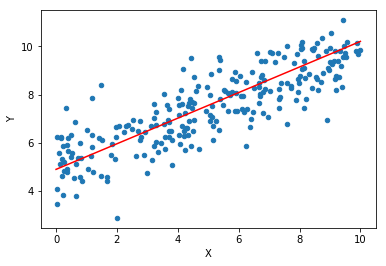

In [56]:
my_data.sample(250).plot(kind ='scatter', x='X', y='Y')
plt.plot(x_data, y_hat, 'r')